In [28]:
import os
import pandas as pd
from keras.models import load_model

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
model = load_model('model3.h5')

In [31]:
test_filenames = os.listdir("test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [32]:
#testing generator
test_gen = ImageDataGenerator(rescale=1./255)
test_set = test_gen.flow_from_dataframe(
    test_df, 
    "test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    color_mode="rgb",
    batch_size=1,
    shuffle=False
)

Found 96 validated image filenames.


In [33]:
import numpy as np

In [34]:
## predict
predict = model.predict_generator(test_set, steps=np.ceil(nb_samples))
predict

array([[6.72512054e-02, 5.83320782e-02, 2.53104925e-01, 6.21311843e-01],
       [1.57895416e-03, 3.09709321e-05, 2.82487217e-02, 9.70141411e-01],
       [1.66827696e-03, 3.58716381e-04, 9.14849877e-01, 8.31231028e-02],
       [3.35765481e-02, 4.09509391e-01, 5.42282939e-01, 1.46311074e-02],
       [9.13797319e-03, 5.73203683e-01, 4.16012317e-01, 1.64593267e-03],
       [3.34886811e-03, 8.18036124e-02, 7.58111715e-01, 1.56735778e-01],
       [7.63197541e-02, 6.17996097e-01, 2.95865029e-01, 9.81908478e-03],
       [4.36263792e-02, 2.32409328e-01, 5.43601453e-01, 1.80362865e-01],
       [1.20316781e-02, 5.98386943e-01, 3.85144383e-01, 4.43697209e-03],
       [1.33417532e-04, 7.11192470e-03, 9.15924489e-01, 7.68302605e-02],
       [2.82798052e-01, 3.85254055e-01, 2.59933501e-01, 7.20144138e-02],
       [2.16493756e-09, 1.00000000e+00, 1.52426266e-11, 1.04201197e-14],
       [7.98717886e-02, 6.03472531e-01, 3.08578461e-01, 8.07712227e-03],
       [2.83121738e-11, 1.00000000e+00, 1.01152680e

In [35]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category']

0     3
1     3
2     2
3     2
4     1
     ..
91    1
92    1
93    2
94    2
95    0
Name: category, Length: 96, dtype: int64

In [36]:
## output the results
result = './outcome.csv'
dataframe_sample = pd.DataFrame.from_dict(test_df)
dataframe_sample.to_csv(result,index=False)

In [ ]:
#真實圖片

C:\Users\chin chun tseng\.conda\envs\python36\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


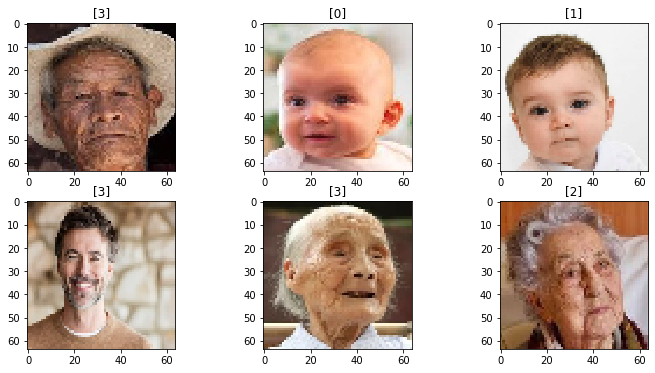

In [37]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(12, 6))
for i in range(1,7):
    ax = plt.subplot(2,3,i)
    img = plt.imread('real/'+str(i)+'.jpg')
    ax.imshow(img1)
    img1 = cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC) 
    image = np.expand_dims(img1, axis=0)
    image.astype('float32')
    img_nor = image/255
    outcome = model.predict_classes(img_nor)
    ax.set_title(outcome)